# Курсовая работа
## Выполнила студентка группы БФИ2202 Фисун Марина Александровна

## Задание

Написать программу, которая будет считывать данные из CSV файла, содержащего информацию о продажах товаров в магазине. Данные в файле содержатся в следующем формате: | Номер заказа | Дата заказа | Название товара | Категория товара | Количество продаж | Цена за единицу | Общая стоимость

Необходимо:
1.	Рассчитать общую выручку магазина.
2.	Найти товар, который был продан наибольшее количество раз.
3.	Найти товар, который принес наибольшую выручку.
4.	Составить отчет, содержащий информацию об общей выручке магазина, количестве проданных единиц каждого товар и доле каждого товара в общей выручке.

Для решения задач необходимо использовать структуры данных, такие как массивы и хеш-таблицы, а также различные алгоритмы обработки данных, например, сортировку и поиск. Также необходимо учитывать возможные ошибки ввода-вывода и обрабатывать их в соответствии с требованиями.

# Код программы:

Необходимые библиотеки для работы

In [ ]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

Чтение CVS-файла

In [ ]:
def read_csv_file(filename):
    records = []
    header = None  # Инициализируем заголовок как None
    try:
        with open(filename, 'r', encoding="utf-8", newline="") as csvfile:
            csv_reader = csv.reader(csvfile)
            header = next(csv_reader)  # Получаем заголовок
            for row in csv_reader:
                records.append(row)
        return header, records  # Возвращаем заголовок вместе с данными
    except Exception as e:
        print(f'Не удалось прочитать файл: {e}')
        return header, []  # Возвращаем заголовок и пустой список записей в случае ошибки

def read_csv_with_pandas(filename):
    try:
        data = pd.read_csv(filename)
        return data
    except Exception as e:
        print(f'Не удалось прочитать файл с помощью pandas: {e}')
        return pd.DataFrame()

Создание функции сортировки прямым обменом / пузырьком

In [ ]:
def BubbleSort(matrix):
    for row in matrix:
        n = len(row)
        for i in range(n-1):
            for j in range(0, n-i-1):
                if row[j] > row[j+1]:
                    row[j], row[j+1] = row[j+1], row[j]
    return matrix

Создание класса для хэш-таблиц

In [ ]:
class Custom_Hash_Table:
    def __init__(self, size):
        self.size = size
        self.table = [[] for _ in range(size)]

    def _hash(self, key):
        return hash(key) % self.size

    def add(self, key, value):
        hash_key = self._hash(key)
        found = False
        for idx, element in enumerate(self.table[hash_key]):
            if element[0] == key:
                self.table[hash_key][idx] = (key, value)
                found = True
                break
        if not found:
            self.table[hash_key].append((key, value))

    def retrieve(self, key):
        hash_key = self._hash(key)
        for element in self.table[hash_key]:
            if element[0] == key:
                return element[1]
        return None

Класс для работы с CSV-файлом

In [ ]:
class CSVAnalyzer:
    def __init__(self, data):
        self.data = data

    def total_revenue(self):
        return sum(float(product[-1]) for product in self.data)

    def total_units_sold(self):
        return sum(int(product[4]) for product in self.data)

    def most_popular_product(self):
        max_sales = max(int(product[4]) for product in self.data)
        hash_table = Custom_Hash_Table(max_sales + 1)
        for product in self.data:
            sales = int(product[4])
            current_product = hash_table.retrieve(sales)
            if current_product is None:
                hash_table.add(sales, product[2])
            else:
                hash_table.add(sales, current_product)
        most_popular_product_name = hash_table.retrieve(max_sales)
        return most_popular_product_name, max_sales

    def highest_revenue_product(self):
        max_revenue = max(float(product[6]) for product in self.data)
        hash_table = Custom_Hash_Table(int(max_revenue) + 1)
        for product in self.data:
            revenue = float(product[6])
            current_product = hash_table.retrieve(revenue)
            if current_product is None:
                hash_table.add(revenue, product[2])
            else:
                hash_table.add(revenue, current_product)
        return hash_table.retrieve(max_revenue), max_revenue

    def product_percentage(self):
        total_revenue = self.total_revenue()
        return [(product[2], round(float(product[6]) / total_revenue, 5)) for product in self.data]

def read_csv_file(file_path):
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)  # Пропускаем заголовок
        data = [row for row in reader]
    return data

Формирование и вывод результатов

In [ ]:
# Создание словаря summary для хранения основной сводки результатов анализа
summary = {
    'Общая выручка': total_revenue,
    'Общее количество проданных единиц': total_units,
    'Популярный продукт': most_popular[0],
    'Товар с наибольшей выручкой': highest_revenue[0],
}

# Создание таблицы для хранения информации о доле каждого товара в общей выручке
percentage_table = {
    'Название товара': [product for product, _ in product_percentages],
    'Доля каждого товара': [percentage for _, percentage in product_percentages],
}

# Создание DataFrame summary_df на основе словаря summary
summary_df = pd.DataFrame([summary])

# Создание DataFrame percentage_df на основе таблицы percentage_table
percentage_df = pd.DataFrame(percentage_table)

print(f'Общая выручка: {total_revenue:.2f} руб.')  # с округлением до двух знаков после запятой
print(f'Общее количество проданных единиц товара: {total_units} шт.')
print(f'Самый популярный товар - {highest_revenue[0]}, выручка по нему: {highest_revenue[1]:.2f} руб.')
print(f'Товар с максимальным количеством продаж: {most_popular[0]}, количество продаж: {most_popular[1]} раз')

print("\nДоля каждого товара в общей выручке:")
print(percentage_df)

# Сохранение сформированных отчетов в файлы
summary_df.to_csv('summary.csv', index=False)
percentage_df.to_csv('percentage.csv', index=False)


Общая выручка: 4161723.00 руб.
Общее количество проданных единиц товара: 277 шт.
Самый популярный товар - Видеокарта, выручка по нему: 699986.00 руб.
Товар с максимальным количеством продаж: Оперативная память, количество продаж: 32 раз

Доля каждого товара в общей выручке:
        Название товара  Доля каждого товара
0              Смартфон              0.09010
1               Ноутбук              0.13215
2             Телевизор              0.07689
3              Наушники              0.04204
4               Планшет              0.05767
5       Игровая консоль              0.06488
6   Цифровая фотокамера              0.08650
7            Умные часы              0.06247
8     Bluetooth колонка              0.03604
9   Внешний аккумулятор              0.01585
10                  SSD              0.04709
11           Видеокарта              0.16820
12   Оперативная память              0.03844
13              Монитор              0.06608
14           Клавиатура              0.01561


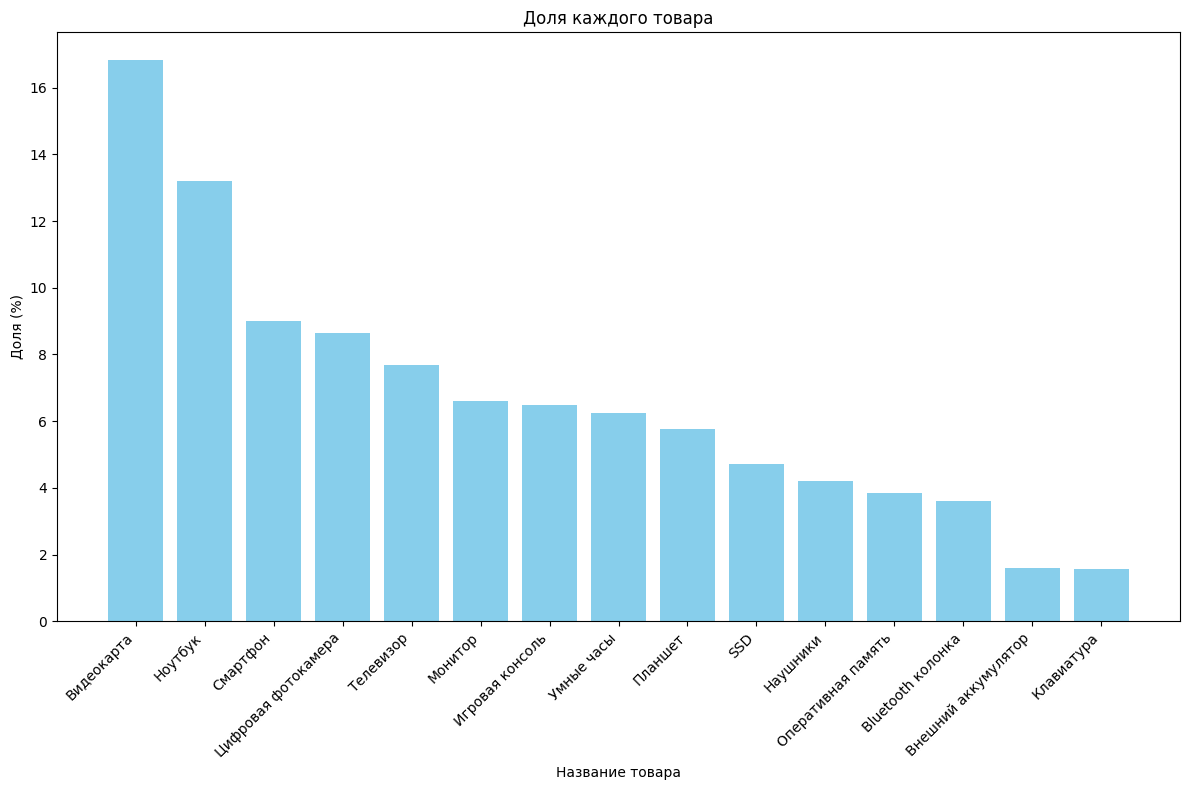

In [ ]:
# Функция для построения графика долей товаров
def plot_product_shares(data, shares):
    # Преобразуем data в DataFrame
    df = pd.DataFrame(data, columns=['Номер заказа', 'Дата заказа', 'Название товара', 'Категория товара', 'Количество продаж', 'Цена за единицу', 'Общая стоимость'])

    product_names = df['Название товара']
    shares_series = pd.Series([share[1] for share in shares], index=[share[0] for share in shares])
    sorted_shares = shares_series.sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    plt.bar(sorted_shares.index, sorted_shares.values * 100, color='skyblue')
    plt.xlabel('Название товара')
    plt.ylabel('Доля (%)')
    plt.title('Доля каждого товара')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

file_path = 'products.csv'
data, shares = calculate_and_display_revenue(file_path)
plot_product_shares(data, shares)